In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 15,7

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel("Covid_cases_in_India.xlsx")

In [4]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [5]:
df.drop(['S. No.'],axis=1,inplace=True)

In [6]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [7]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [8]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [9]:
total_cases = df['Total Cases'].sum()
print("Total cases in india: " , total_cases)

Total cases in india:  729


In [10]:
df['Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])

In [11]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [12]:
df['Total Cases'].max()

147

In [13]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
Total_Active_Cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [15]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [16]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


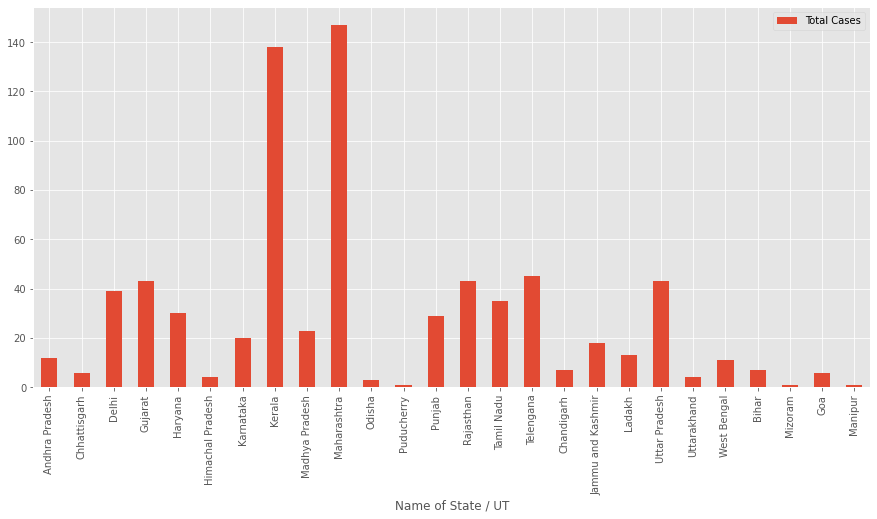

In [17]:
#pandas
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')

<BarContainer object of 26 artists>

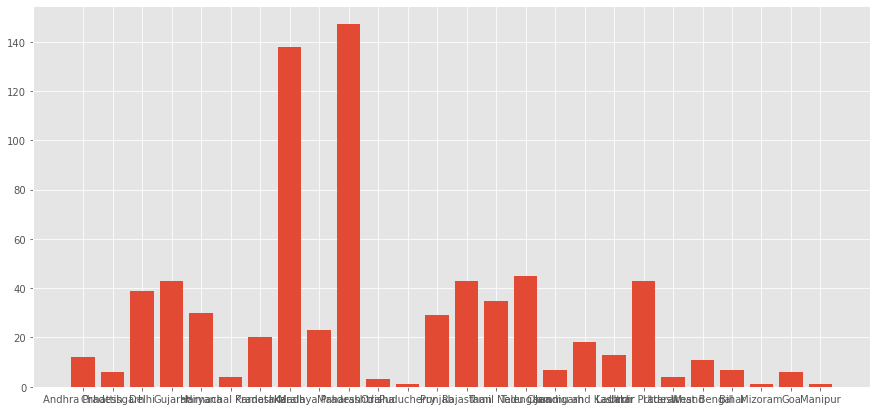

In [18]:
#matplotlib
plt.bar(df['Name of State / UT'],df['Total Cases'])

In [19]:
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

In [20]:
px.bar(df,x='Name of State / UT',y='Total Cases')

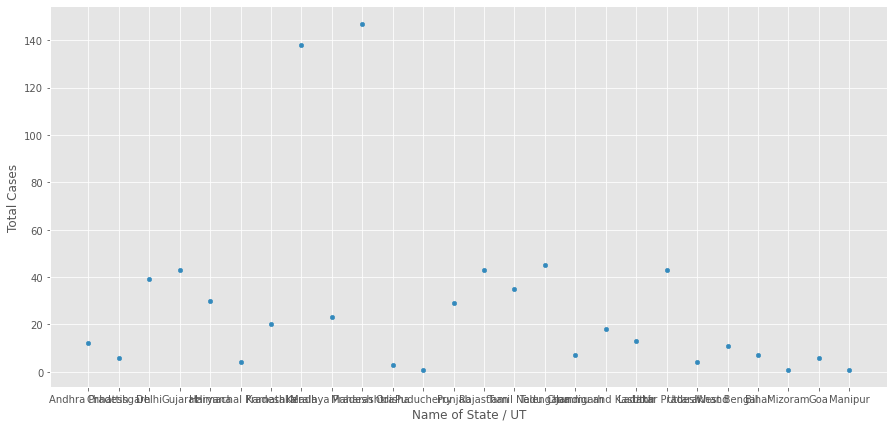

In [21]:
df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')

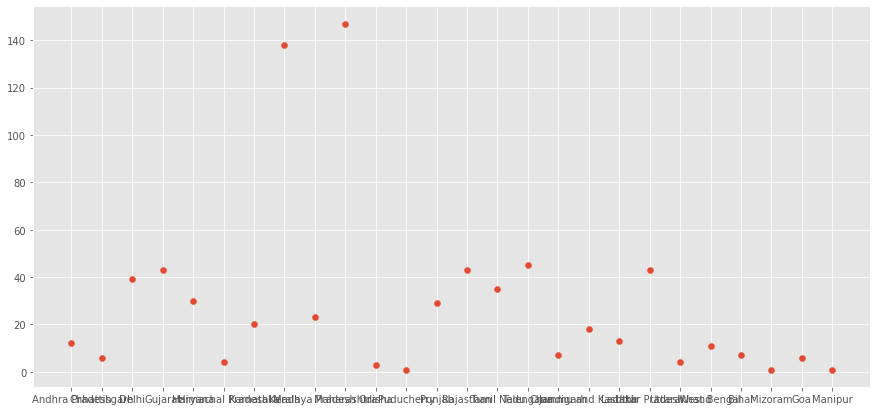

In [22]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])

In [23]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=15)


In [24]:
px.scatter(df,x='Name of State / UT',y='Total Cases')

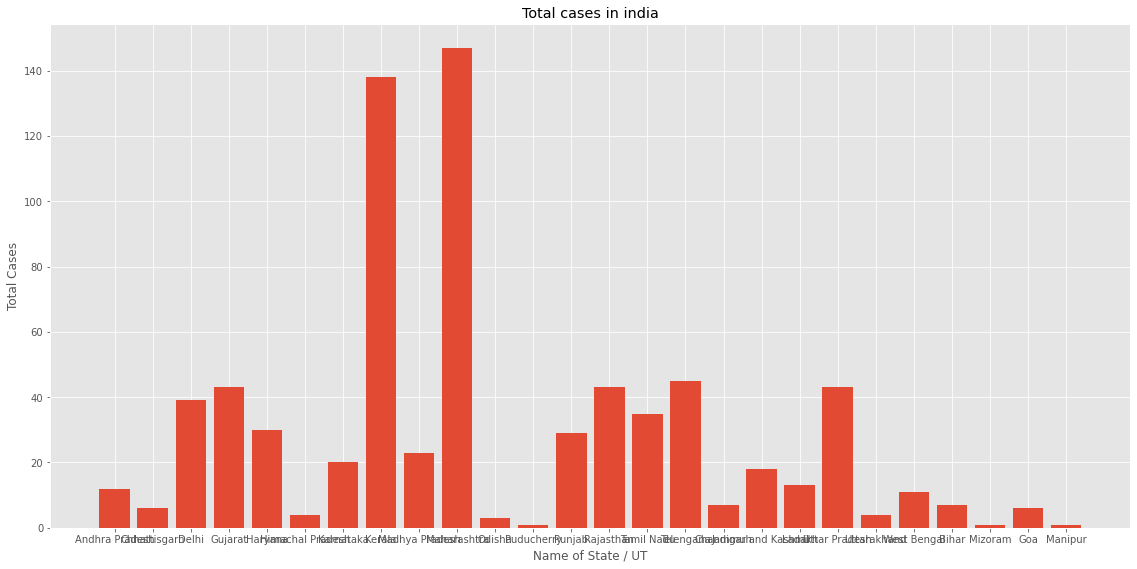

In [25]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title('Total cases in india')
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total Cases')
plt.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='My Graph',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [27]:
Indian_Cord = pd.read_excel("Indian Coordinates.xlsx")

In [28]:
Indian_Cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [29]:
df_full = pd.merge(Indian_Cord,df,on='Name of State / UT')

In [30]:
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [31]:
map = folium.Map(location=[20,70],zoom_start=4,titles='stamenterrain')

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>''<strong> \
    Total Cases</strong>: '+ str(value) +'<br'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [32]:
map

In [39]:
dbd_India = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [40]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


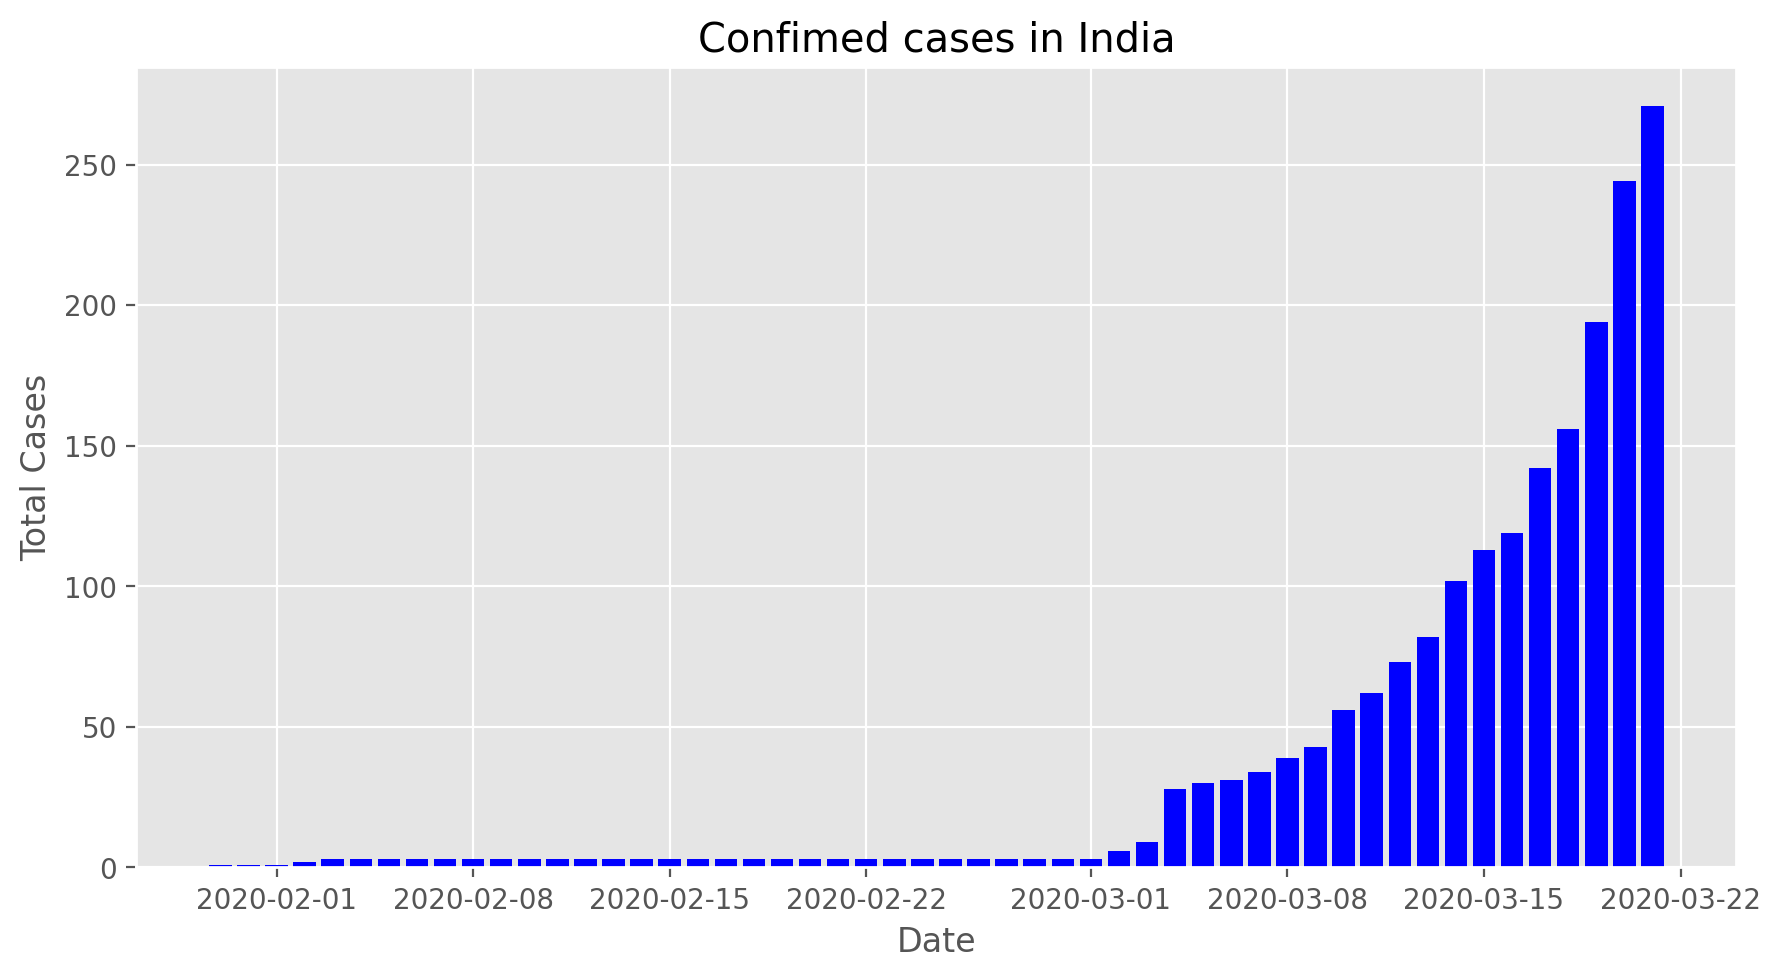

In [50]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confimed cases in India")
plt.show()

In [51]:
fig = px.bar(dbd_India,x="Date",y="Total Cases",color="Total Cases", title='Confirmed Cases in india')
fig.show()

In [52]:
fig = px.bar(dbd_Italy,x="Date",y="Total Cases",color="Total Cases", title='Confirmed Cases in Italy')
fig.show()

In [53]:
fig = px.bar(dbd_Korea,x="Date",y="Total Cases",color="Total Cases", title='Confirmed Cases in Korea')
fig.show()

In [54]:
fig = px.bar(dbd_Wuhan,x="Date",y="Total Cases",color="Total Cases", title='Confirmed Cases in Wuhan')
fig.show()

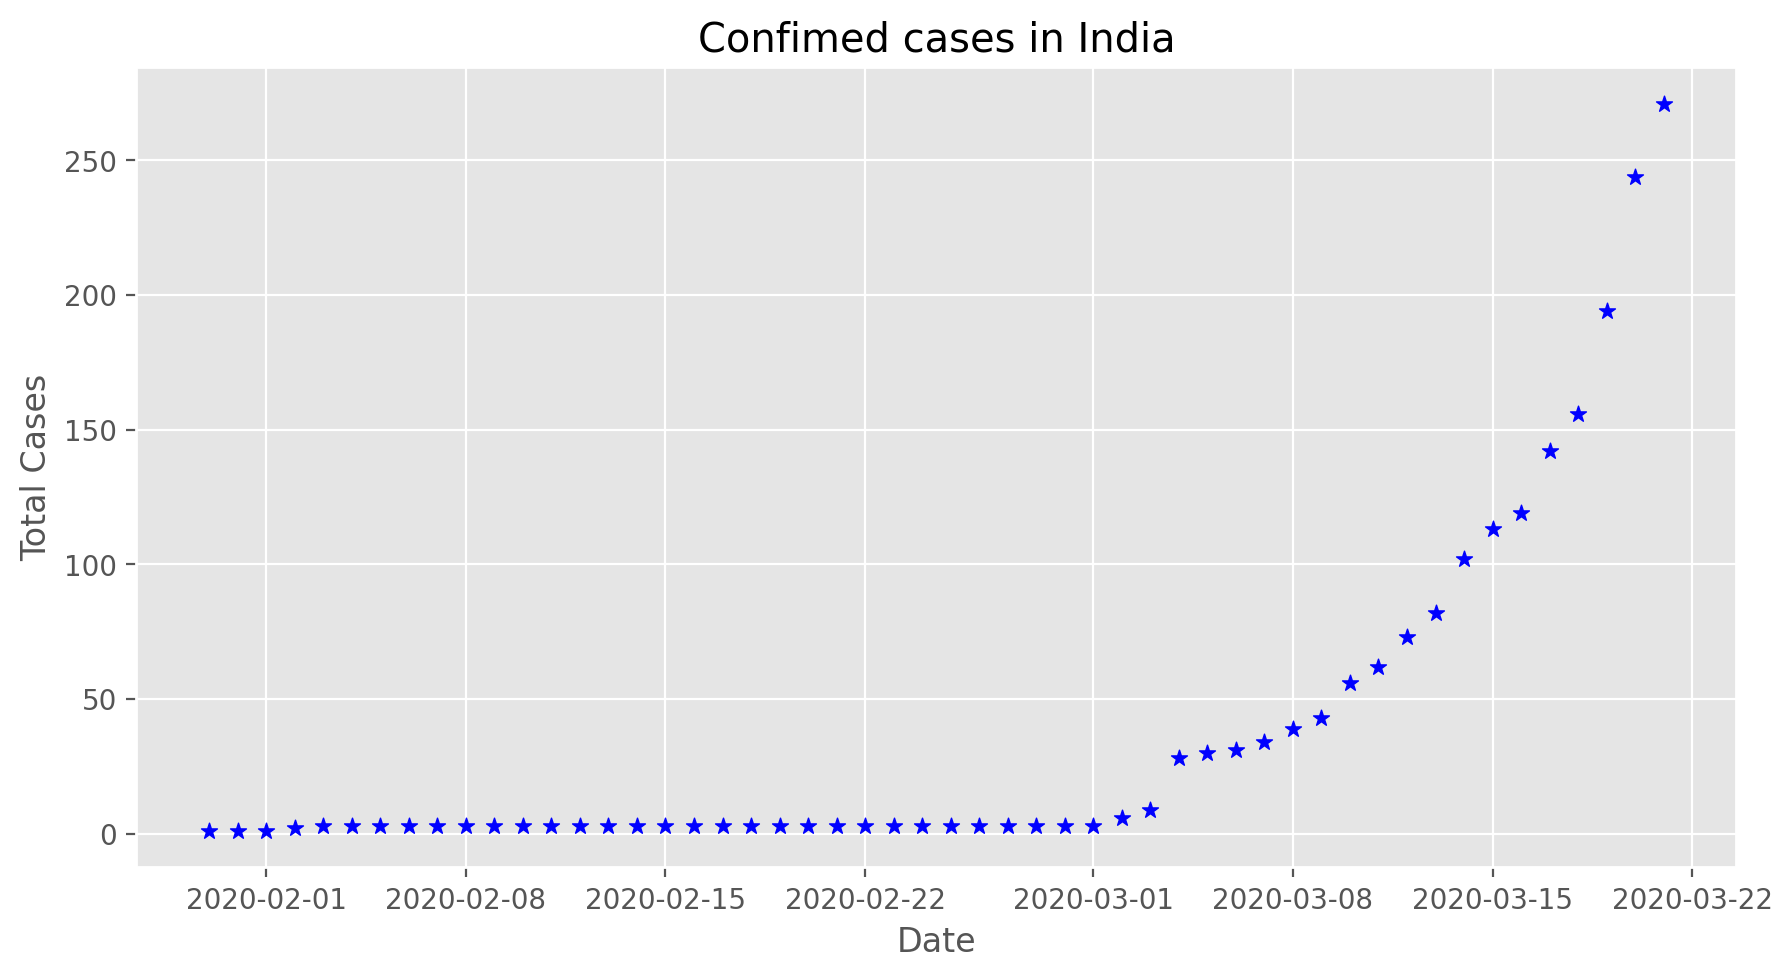

In [57]:
fig1 = plt.figure(figsize=(10,5),dpi=200)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confimed cases in India")
plt.show()

In [56]:
fig = px.scatter(dbd_India,x="Date",y="Total Cases",color="Total Cases", title='Confirmed Cases in india')
fig.show()

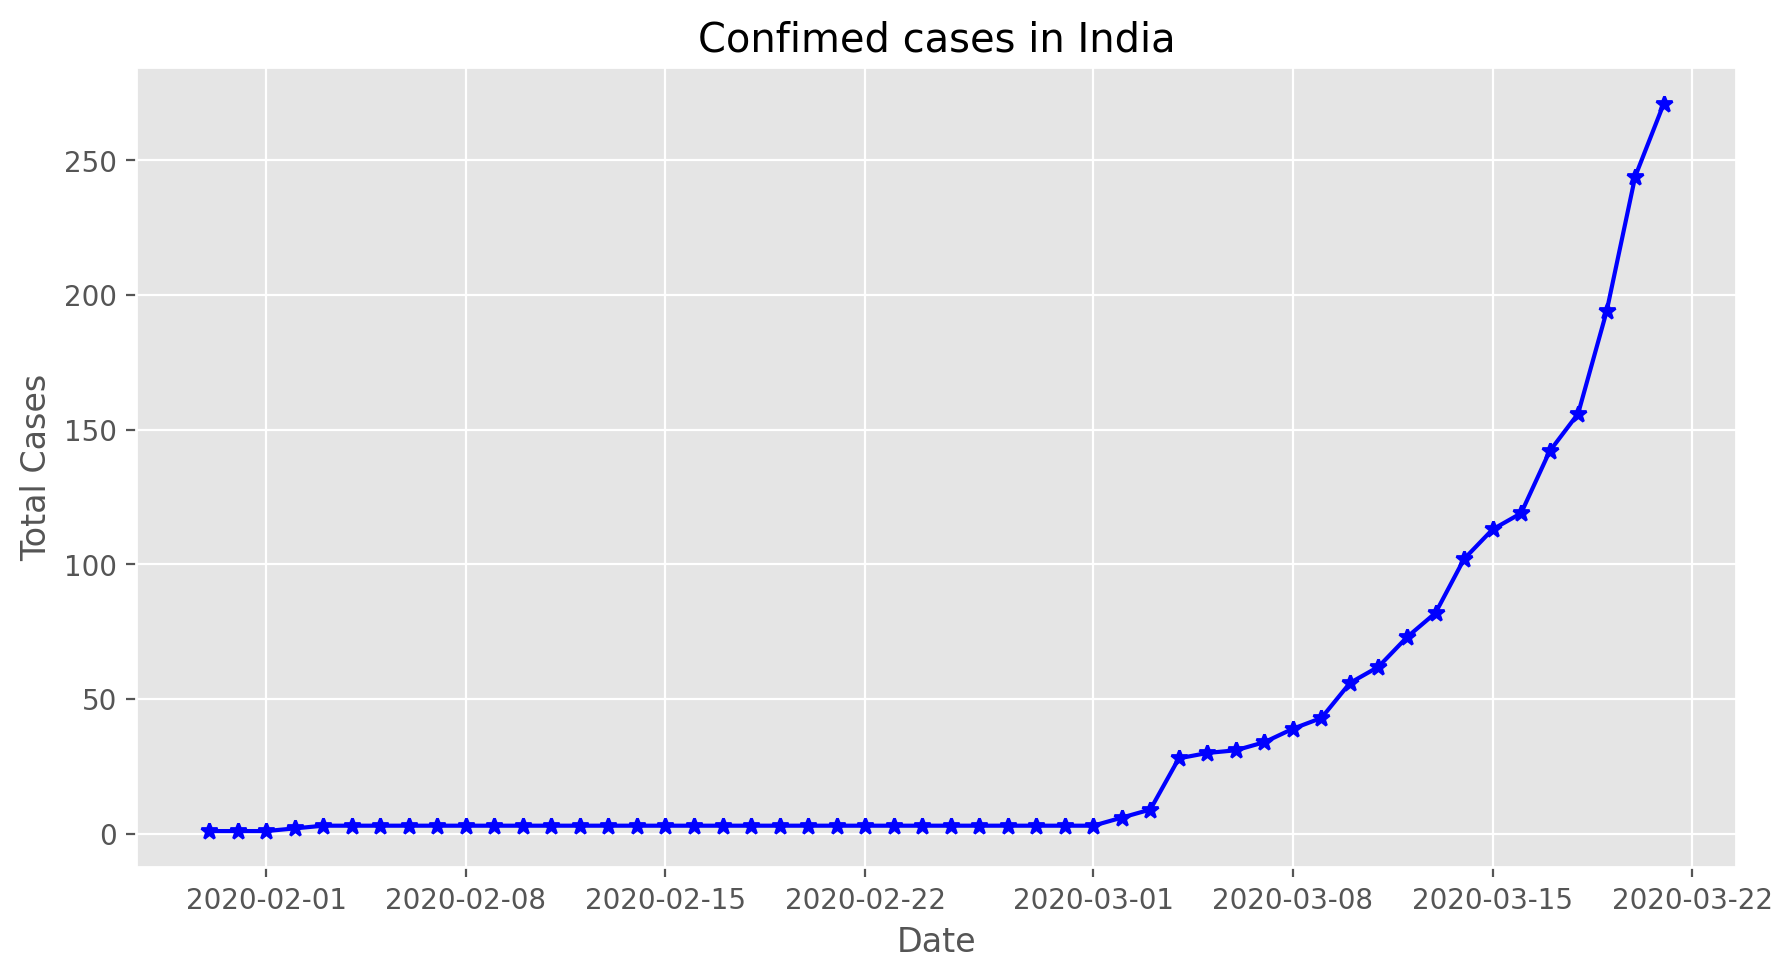

In [58]:
fig2 = plt.figure(figsize=(10,5),dpi=200)
axes = fig2.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confimed cases in India")
plt.show()

In [62]:
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [64]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))

In [67]:
dataset1 = pd.read_csv("covid_19_data.csv",parse_dates=['Last Update'])

In [71]:
dataset1.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [70]:
dataset1.rename(columns={"ObservationDate":"Date","Country/Region":"Country"},inplace=True)

In [75]:
dataset1.query('Country=="India"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [76]:
dataset1.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [84]:
confirmed = dataset1.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
5,01/27/2020,2927.0
6,01/28/2020,5578.0
7,01/29/2020,6165.0
8,01/30/2020,8235.0
9,01/31/2020,9925.0


In [87]:
Deaths = dataset1.groupby('Date').sum()['Deaths'].reset_index()
Deaths

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
5,01/27/2020,82.0
6,01/28/2020,131.0
7,01/29/2020,133.0
8,01/30/2020,171.0
9,01/31/2020,213.0


In [86]:
Recovered = dataset1.groupby('Date').sum()['Recovered'].reset_index()
Recovered

,Date,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
5,01/27/2020,61.0
6,01/28/2020,107.0
7,01/29/2020,126.0
8,01/30/2020,143.0
9,01/31/2020,222.0


In [92]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig4.add_trace(go.Scatter(x=Deaths['Date'],y=Deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))

fig4.add_trace(go.Scatter(x=Recovered['Date'],y=Recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [94]:
data_conf = pd.read_csv("time_series_covid_19_confirmed.csv")

In [97]:
dataset1.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [101]:
data_conf.rename(columns={'Country/Region':'Country'},inplace=True)

In [103]:
data_conf1 = pd.merge(dataset1,data_conf,on=['Country','Province/State'])

In [104]:
data_conf1.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [112]:
fig = px.density_mapbox(data_conf1,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title="Worldwide Corona Virus Cases")
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})